# Steam Tables

Two packages:
- IAPWS (license = GNU, which limits uses) https://pypi.org/project/iapws/
- Chemicals (license = MIT, which is a more open license and therefore preferred) https://chemicals.readthedocs.io/

The chemicals package uses SI units...  

so pressure is in Pascals (Pa)
- 1.e6 Pa = 1 Mega Pascal (MPa)
- 1.e5 Pa = 1 bar

and temperature is Kelvin
- Degrees celsius = Kelvin - 273.15

Ensure that pressure is absolute not gauge. 

Data used in this notebooks comes from https://github.com/ICWallis/T21-Tutorial-WellTestAnalysis

In [17]:
from chemicals import iapws
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# What is the saturation temperature for 30 bara?

P_Pa = 30.e5
Tsat_C = iapws.iapws95_Tsat(P_Pa) - 273.15 # convert from K to C
print(round(Tsat_C,2))

233.85


In [4]:
# What is the saturation pressure for 100 degC?

Temp_C = 100
T_K = Temp_C + 273.15 # convert from C to K
Psat_bar = iapws.iapws95_Psat(T_K) / 1.e5 # convert from Pa to bar

print(round(Psat_bar,2))

1.01


In [5]:
# For a given temperature - pressure pair, calculate fluid properties enthalpy and density

T_K = 233.85 + 273.15
P_Pa = 30.e5

properties = iapws.iapws95_properties(T=T_K, P=P_Pa)

print(properties)

H_kJpkg = properties[3] * 1.e-3 # convert J/kg to kJ/kg
density = properties[0] # kg/m3

print(round(H_kJpkg,2), round(density,2))

(821.9048374286575, 1004679.8969504833, 2645.519725645341, 1008329.9545525113, 3203.5551231146037, 4718.563187257297, 1213.0965739548726, -3.1764983850030324e-08, 0.00014988508343857532, 2.260859379365764e-07, 1.0008910862877812e-06)
1008.33 821.9


The fluid properties function returns a tuple and the method above slices out the values we want. 

Refer to the docs for the tuple definition: 
https://chemicals.readthedocs.io/chemicals.iapws.html#iapws-95-properties

## Calculate the BPD for a static temperature profile

In [6]:
data = pd.read_csv('3-Static-PT.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    94 non-null     float64
 1   whp_barg   94 non-null     float64
 2   pres_barg  94 non-null     float64
 3   temp_degC  94 non-null     float64
dtypes: float64(4)
memory usage: 3.1 KB


In [11]:
data['pres_Pa'] = (data.pres_barg + 1) * 1.e5

In [12]:
data.head()

,depth_m,whp_barg,pres_barg,temp_degC,pres_bara,pres_Pa
0,0.0,4.019268,3.929268,10.48,4.929268,492926.773131
1,10.5,4.019268,3.929268,10.86,4.929268,492926.773131
2,20.7,4.019268,3.929268,11.63,4.929268,492926.773131
3,30.4,4.019268,3.939268,12.25,4.939268,493926.773131
4,40.3,4.019268,3.949268,12.77,4.949268,494926.773131


In [14]:
# assuming pure water, calculate the BPD curve

well_Tsat_C = []

for val in data.pres_Pa.values:
    Tsat_C = iapws.iapws95_Tsat(val) - 273.15
    well_Tsat_C.append(Tsat_C)

data['Tsat_degC'] = well_Tsat_C

In [20]:
data.columns

Index(['depth_m', 'whp_barg', 'pres_barg', 'temp_degC', 'pres_bara', 'pres_Pa',
       'Tsat_degC'],
      dtype='object')

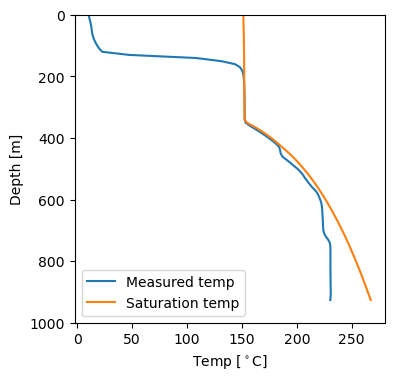

In [25]:
fig, ax = plt.subplots(1,1,figsize = (4,4))

ax.plot(
    data.temp_degC.values,
    data.depth_m.values,
    label = 'Measured temp'
)

ax.plot(
    data.Tsat_degC.values,
    data.depth_m.values,
    label = 'Saturation temp'
)

ax.set_ylim(1000,0)
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Temp [$^\circ$C]') # Latex used to format unit
ax.legend()

## What if it's not pure water?

Work in progress, contributors welcome...

https://github.com/Geothermal-Fluids/bpd_curve